In [1]:

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [17]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [18]:
df = pd.read_csv('RAINN.csv',parse_dates = ['YEAR'])
#df = pd.read_csv('JF.csv',parse_dates = ['YEAR'])
#df = pd.read_csv('MAM.csv',parse_dates = ['YEAR'])
#df = pd.read_csv('JJAS.csv',parse_dates = ['YEAR'])
#df = pd.read_csv('OND.csv',parse_dates = ['YEAR'])
df['YEAR'] = pd.date_range(start='1901', end='2017',freq = 'AS')
df = df.set_index(['YEAR'])

In [19]:
df.describe()


,ANNUAL
count,117.000000
mean,947.021368
std,168.151177
min,318.000000
25%,866.900000
50%,950.500000
75%,1045.900000
max,1365.300000


In [20]:
#df['inde'] =date_list
#df.set_index(['YEAR'], inplace=True)
df.index.name=None

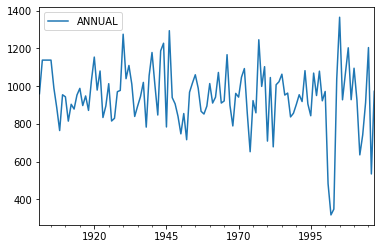

In [21]:
df.plot()

In [22]:
### Testing For Stationarity
from statsmodels.tsa.stattools import adfuller

In [23]:
#Ho: It is non stationary
#H1: It is stationary
#Change the datasetname depends upon the dataset 

def adfuller_test(RAINN):
    result=adfuller(RAINN)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [27]:
adfuller_test(df['ANNUAL'])

ADF Test Statistic : -8.447148826983852
p-value : 1.700664179531161e-13
#Lags Used : 0
Number of Observations Used : 116
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


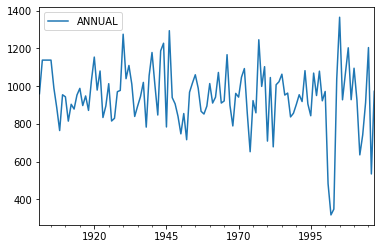

In [28]:
#df['Seasonal First Difference']=df['ANNUAL']-df['ANNUAL'].shift(12)
df.plot()

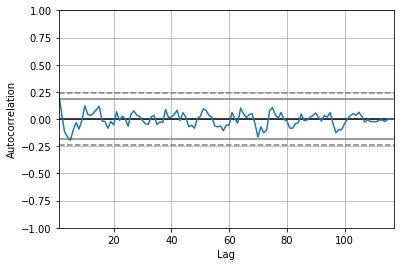

In [30]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['ANNUAL'])
plt.show()

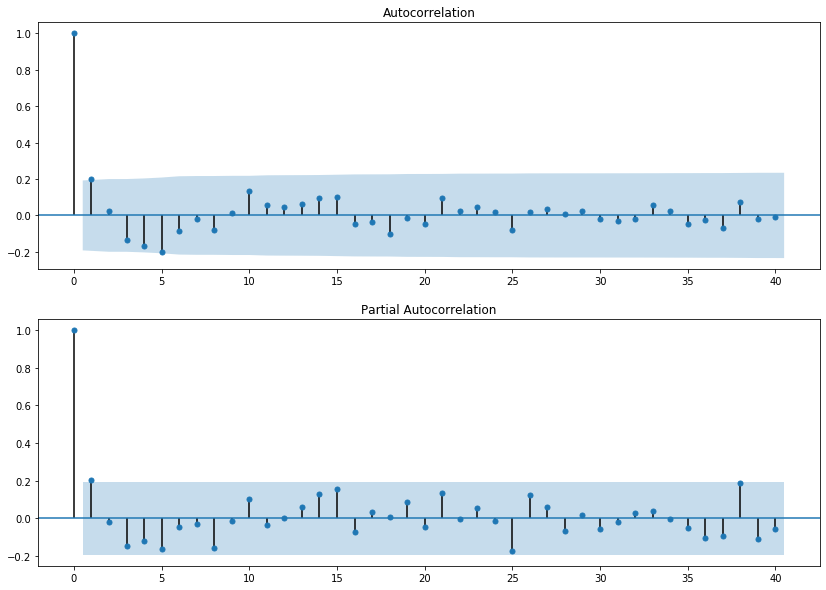

In [31]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.iloc[13:],lags=40,ax=ax2)

In [32]:
# For non-seasonal data
from statsmodels.tsa.arima_model import ARIMA

In [33]:
model=ARIMA(df['ANNUAL'],order=(1,1,1))
model_fit=model.fit()

C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [34]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.ANNUAL   No. Observations:                  116
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -757.096
Method:                       css-mle   S.D. of innovations            162.252
Date:                Tue, 21 Jul 2020   AIC                           1522.192
Time:                        11:11:11   BIC                           1533.207
Sample:                    01-01-1902   HQIC                          1526.664
                         - 01-01-2017                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.8025      0.563     -1.425      0.157      -1.906       0.301
ar.L1.D.ANNUAL     0.2166      0.091      2.378      0.019       0.038       0.395
ma.L1.D.ANNUAL    -0.9999      0.022    -45.005      0.000      -1.043      -0.956
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            4.6160           +0.0000j            4.6160            0.0000
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

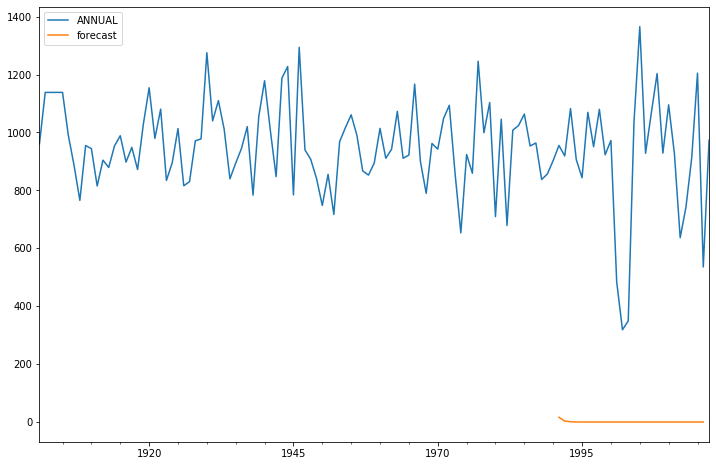

In [35]:
df['forecast']=model_fit.predict(start=90,end=115,dynamic=True)
df[['ANNUAL','forecast']].plot(figsize=(12,8))

In [238]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [41]:
model1=sm.tsa.statespace.SARIMAX(df['ANNUAL'],order=(0,1,1),seasonal_order=(1,1,0,12),trend='n')
result=model1.fit()
result.summary()

C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                             ANNUAL   No. Observations:                  117
Model:             SARIMAX(0, 1, 1)x(1, 1, 0, 12)   Log Likelihood                -703.244
Date:                            Tue, 21 Jul 2020   AIC                           1412.488
Time:                                    11:12:27   BIC                           1420.421
Sample:                                01-01-1901   HQIC                          1415.702
                                     - 01-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9999     10.384     -0.096      0.923     -21.353      19.353
ar.S.L12      -0.5534      0.075     -7.363      0.000      -0.701      -0.406
sigma2      4.014e+04   4.14e+05      0.097      0.923   -7.72e+05    8.52e+05
===================================================================================
Ljung-Box (Q):                       36.30   Jarque-Bera (JB):                17.19
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):               2.74   Skew:                            -0.64
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

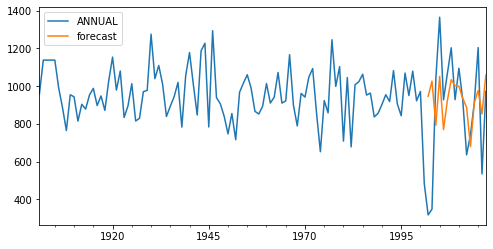

In [44]:
df['forecast']=result.predict(start=101,end=116,dynamic=True)
df[['ANNUAL','forecast']].plot(figsize=(8,4))

In [45]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(years=x)for x in range(0,31)]

In [46]:
y_a = df['forecast']
y_b= df['ANNUAL']

In [47]:
y_pred=y_a.tail()
y_test=y_b.tail()

In [48]:
y_test

2013-01-01     741.9
2014-01-01     913.0
2015-01-01    1204.6
2016-01-01     535.0
2017-01-01     973.0
Name: ANNUAL, dtype: float64

In [49]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [50]:

future_datest_df.tail()

,ANNUAL,forecast
2043-01-01,NaN,NaN
2044-01-01,NaN,NaN
2045-01-01,NaN,NaN
2046-01-01,NaN,NaN
2047-01-01,NaN,NaN


In [51]:
future_df=pd.concat([df,future_datest_df])

Text(0, 0.5, 'Rainfall in mm')

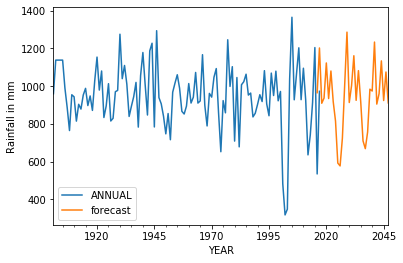

In [52]:
future_df['forecast'] = result.predict(start = 115, end = 250, dynamic= True)  
ax =future_df['1900':].plot(label='observed')
ax.set_xlabel('YEAR')
ax.set_ylabel('Rainfall in mm')

#future_df[['ANNUAL','forecast']].plot(figsize=(12, 8))

In [53]:
from sklearn import metrics

In [54]:
print(metrics.mean_absolute_error(y_test, y_pred))

138.6856442680501
